# Parameter Optimisation Plots
Construction of plots denoting hyperparameter exploration for both methods exploiting image ratios to identify change.

## 1. Simple Ratio Method

In [2]:
import matplotlib.pyplot as plt

tRoseau = [[-0.1,0,0.001,0.01,0.05,0.1],[0.9681,0.9093,0.9093,0.8992,0.8492,0.7804],[0.3828,0.3895,0.3886,0.3894,0.393,0.3875],[0.5486,0.5453,0.5445,0.5435,0.5373,0.5179]]
tAbricots = [[-0.2,-0.1,-0.01,0,0.001,0.01,0.05],[0.8874,0.8559,0.8243,0.8243,0.8243,0.8108,0.72],[0.2694,0.243,0.2212,0.2202,0.2199,0.221,0.2119],[0.4134,0.3785,0.3479,0.3476,0.3472,0.3473,0.3275]]

hRoseau = [[0.01,0.1,0.3],[0.2409,0.8473,0.9093],[0.3738,0.3898,0.3886],[0.293,0.534,0.5445]]
hAbricots = [[0.01,0.05,0.07,0.1,0.3],[0.1847,0.6261,0.7477,0.8243,0.9778],[0.2011,0.233,0.2311,0.2199,0.1642],[0.1926,0.3396,0.3509,0.3472,0.2811]]

kRoseau = [[0,1,2],[0.9093,0.607,0.2121],[0.3886,0.3389,0.2465],[0.5445,0.4349,0.228]]
kAbricots = [[0,1,2,3],[0.82,0.8378,0.3153,0.473],[0.2199,0.2306,0.2112,0.2034],[0.3472,0.3617,0.253,0.2845]]

aRoseau = [[0.0003,0.0004,0.0005],[0.8424,0.9093,0.9443],[0.2778,0.3886,0.475],[0.4179,0.5445,0.632]]
aAbricots = [[0.0003,0.0004,0.0005],[0.7252,0.8243,0.8919],[0.1475,0.2199,0.2918],[0.2452,0.3472,0.4398]]

dRoseau = [[0,1,2,3],[0.8494,0.9158,0.9093,0.7918],[0.4225,0.5063,0.3886,0.0589],[0.5643,0.6521,0.5445,0.1097]]
dAbricots = [[0,1,2,3],[0.8487,0.8316,0.8243,0.81],[0.2741,0.2622,0.2199,0.1472],[0.4143,0.3987,0.3472,0.2491]]

bRoseau = [[0,1,2,3,4,5],[0.8761,0.9456,0.9424,0.9718,0.8786,0.9093],[0.4241,0.3621,0.3752,0.3512,0.4002,0.3886],[0.5715,0.5236,0.5368,0.5159,0.5499,0.5445]]
bAbricots = [[0,1,2,3,4,5],[0.5946,0.4955,0.4775,0.6171,0.4459,0.8243],[0.1594,0.3064,0.2419,0.1885,0.1487,0.2199],[0.2514,0.3786,0.3211,0.2887,0.2230,0.3472]]

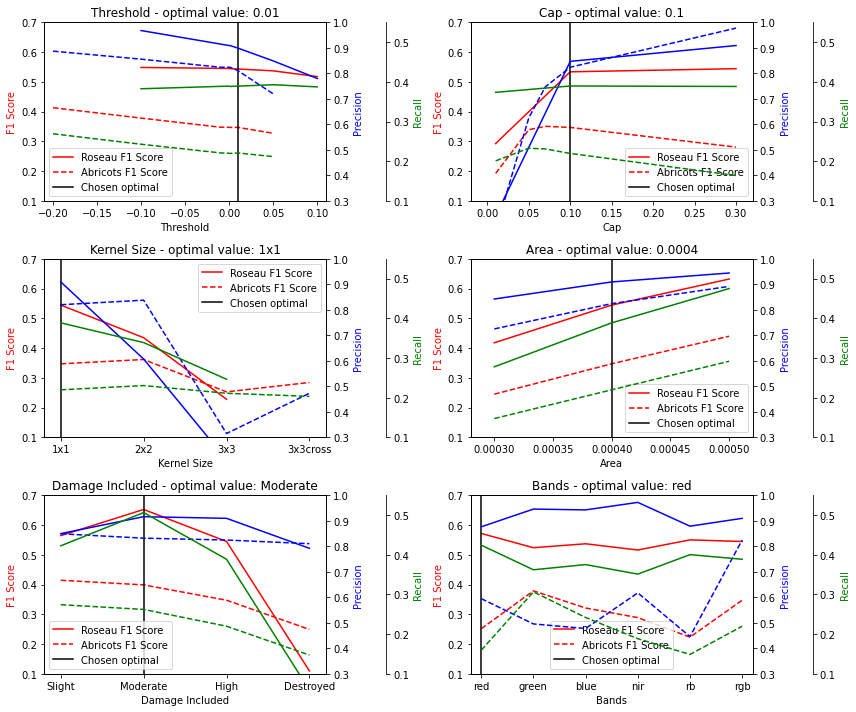

In [65]:
fig, axs = plt.subplots(3,2,figsize=(12,10)) 

def plotting(values1,values2,subplot,axs,xlim,axName,best,ticks=False): 
    host = axs[subplot]
    par1 = host.twinx()
    par2 = host.twinx()

    host.set_xlim(xlim)
    host.set_ylim(0.1, 0.7)
    par1.set_ylim(0.3, 1)
    par2.set_ylim(0.1, 0.55)

    host.set_xlabel(axName)
    host.set_ylabel("F1 Score")
    par1.set_ylabel("Precision")
    par2.set_ylabel("Recall")
    
    if ticks: plt.xticks(values1[0], ticks)
    p1, = host.plot(values1[0], values1[3],    color='red', label="Roseau F1 Score")
    p2, = par1.plot(values1[0], values1[1],    color='blue', label="Precision")
    p3, = par2.plot(values1[0], values1[2], color='green', label="Recall")

    if ticks: plt.xticks(values2[0], ticks)
    p4, = host.plot(values2[0], values2[3], 'r--', label="Abricots F1 Score")
    p5, = par1.plot(values2[0], values2[1], 'b--', label="Precision")
    p6, = par2.plot(values2[0], values2[2], 'g--', label="Recall")
    
    p7, = host.plot([best,best],[0,1],'k-',label = 'Chosen optimal')

    lns = [p1, p4,p7]
    host.legend(handles=lns, loc='best')
    titBest = ticks[best] if ticks else str(best)
    host.set_title(axName+' - optimal value: '+titBest)

    par2.spines['right'].set_position(('outward', 60))

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

plotting(tRoseau,tAbricots,(0,0),axs,(-0.21,0.11),'Threshold',0.01)    
plotting(hRoseau,hAbricots,(0,1),axs,(-0.02,0.32), 'Cap',0.1)
plotting(kRoseau,kAbricots,(1,0),axs,(-0.2,3.2),'Kernel Size',0,['1x1','2x2','3x3','3x3cross']) 
plotting(aRoseau,aAbricots,(1,1),axs,(0.00028,0.00052),'Area',0.0004) 
plotting(dRoseau,dAbricots,(2,0),axs,(-0.2,3.2),'Damage Included',1,['Slight','Moderate','High','Destroyed']) 
plotting(bRoseau,bAbricots,(2,1),axs,(-0.2,5.2),'Bands',0,['red','green','blue','nir','rb','rgb']) 
# Adjust spacings w.r.t. figsize
fig.tight_layout()

# Best for professional typesetting, e.g. LaTeX
plt.savefig("pyplot.pdf")

## 2. Deep Learning Approach

In [1]:
# Data [[hyperparameter values],[precision scores],[recall scores],[F1 scores]]
lr = [[1E-5,1E-4,1E-3,1E-2,1E-1],[0.787,0.884,0.967,0.515,0],[0.695,0.915,0.963,0.827,0],[0.738,0.899,0.965,0.635,0],[0.439,0.316,0.338,0,0],[0.027,0.155,0.138,0,0],[0.051,0.208,0.196,0,0]]
epochs = [[10,20,30,40,50,60,70,80,90,100],[0.884,0.938,0.97,0.985,0.992,0.99,0.997,0.998,0.999,0.9997],[0.915,0.955,0.98,0.989,0.994,0.992,0.998,0.999,0.999,0.9997]]
epochs2 = [[10,20,50,100],[0.899,0.947,0.993,0.9997],[0.316,0.345,0.384,0.369],[0.155,0.119,0.12,0.11],[0.208,0.177,0.182,0.169]]
batch = [[4,8,16,32],[0.917,0.884,0.857,0.821],[0.934,0.915,0.897,0.857],[0.925,0.899,0.876,0.839],[0.317,0.316,0.432,0.355],[0.101,0.155,0.075,0.043],[0.153,0.208,0.127,0.077]]
n_samples = [[1000,2000,4000,8000],[0.825,0.884,0.937,0.973],[0.837,0.915,0.958,0.983],[0.831,0.899,0.947,0.978],[0.476,0.316,0.407,0.3458],[0.08,0.155,0.109,0.097],[0.136,0.208,0.172,0.151]]
padding = [[0,2],[0.896,0.908],[0.832,0.771],[0.863,0.834],[0.4599,0.311],[0.056,0.154],[0.1,0.21]]
tilesize = [[16,32],[0.927,0.896],[0.748,0.832],[0.828,0.863],[0.281,0.4599],[0.123,0.056],[0.171,0.1]]
area = [[0.0001, 0.0002, 0.0003],[0.801,0.896,0.894],[0.596,0.832,0.851],[0.683,0.863,0.872],[0.369,0.4599,0.373],[0.231,0.056,0.434],[0.284,0.1,0.4]]

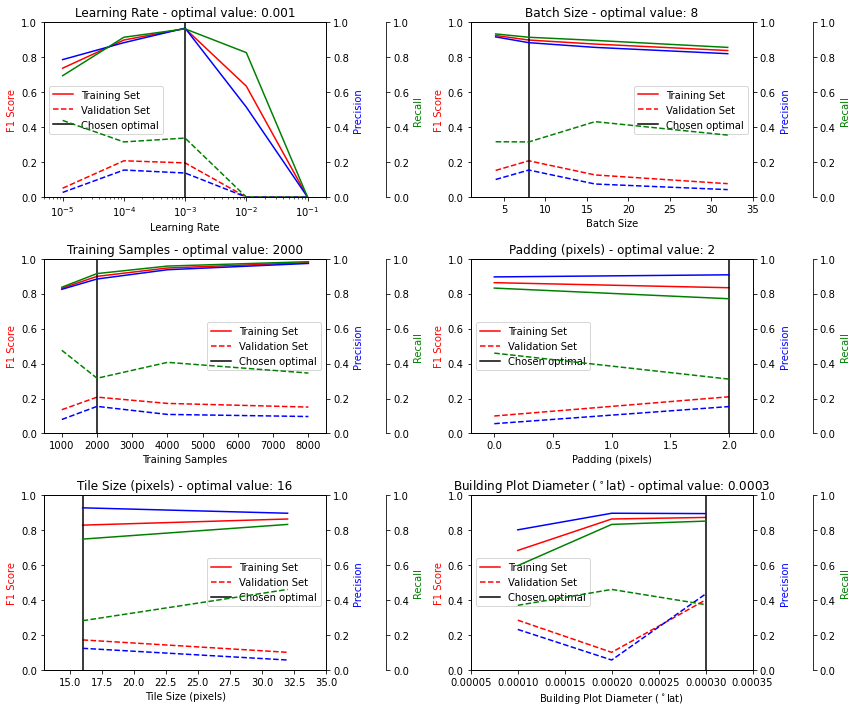

In [38]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,2,figsize=(12,10)) 

def plot_dl(values,subplot,xlim,axName,best,log=False,ticks=False): 
    host = axs[subplot]
    par1 = host.twinx()
    par2 = host.twinx()

    host.set_xlim(xlim)
    host.set_ylim(0, 1)
    par1.set_ylim(0, 1)
    par2.set_ylim(0, 1)

    host.set_xlabel(axName)
    host.set_ylabel("F1 Score")
    par1.set_ylabel("Precision")
    par2.set_ylabel("Recall")
    
    if log: host.set_xscale("log",nonposx='clip')
    
    if ticks: plt.xticks(values1[0], ticks)
    p1, = host.plot(values[0], values[3],    color='red', label="Training Set")
    p2, = par1.plot(values[0], values[1],    color='blue', label="Precision")
    p3, = par2.plot(values[0], values[2], color='green', label="Recall")

    if ticks: plt.xticks(values2[0], ticks)
    p4, = host.plot(values[0], values[6], 'r--', label="Validation Set")
    p5, = par1.plot(values[0], values[5], 'b--', label="Precision")
    p6, = par2.plot(values[0], values[4], 'g--', label="Recall")
    
    p7, = host.plot([best,best],[0,1],'k-',label = 'Chosen optimal')

    lns = [p1,p4,p7]
    host.legend(handles=lns, loc='best')
    titBest = ticks[best] if ticks else str(best)
    host.set_title(axName+' - optimal value: '+titBest)

    par2.spines['right'].set_position(('outward', 60))

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

plot_dl(lr,(0,0),(5E-6,2E-1),'Learning Rate',1E-3,log=True)
plot_dl(batch,(0,1),(1,35),'Batch Size',8)  
plot_dl(n_samples,(1,0),(500,8500),'Training Samples',2000)
plot_dl(padding,(1,1),(-0.2,2.2),'Padding (pixels)',2)
plot_dl(tilesize,(2,0),(13,35),'Tile Size (pixels)',16)
plot_dl(area,(2,1),(0.00005,0.00035),'Building Plot Diameter ($^\circ$lat)',0.0003)

#ax3 = fig.add_subplot(gs[3, :])

# Adjust spacings w.r.t. figsize
fig.tight_layout()

# Best for professional typesetting, e.g. LaTeX
plt.savefig("cd_ratio_po1.pdf")

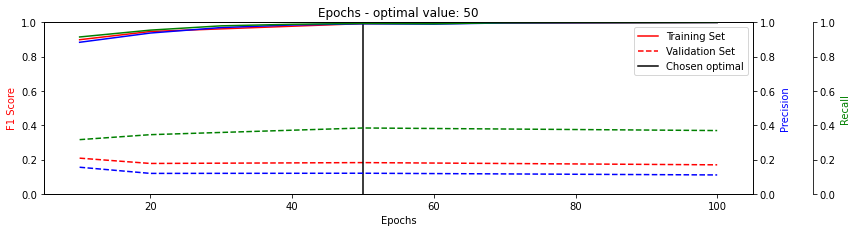

In [37]:
fig, axs = plt.subplots(1,1,figsize=(12,3.3333)) 

def plot_epochs(values,values2,subplot,xlim,axName,best,log=False,ticks=False): 
    host = axs
    par1 = host.twinx()
    par2 = host.twinx()

    host.set_xlim(xlim)
    host.set_ylim(0, 1)
    par1.set_ylim(0, 1)
    par2.set_ylim(0, 1)

    host.set_xlabel(axName)
    host.set_ylabel("F1 Score")
    par1.set_ylabel("Precision")
    par2.set_ylabel("Recall")
    
    if log: host.set_xscale("log",nonposx='clip')
    
    if ticks: plt.xticks(values1[0], ticks)
    p1, = host.plot(values2[0], values2[1],    color='red', label="Training Set")
    p2, = par1.plot(values[0], values[1],    color='blue', label="Precision")
    p3, = par2.plot(values[0], values[2], color='green', label="Recall")

    if ticks: plt.xticks(values2[0], ticks)
    p4, = host.plot(values2[0], values2[4], 'r--', label="Validation Set")
    p5, = par1.plot(values2[0], values2[3], 'b--', label="Precision")
    p6, = par2.plot(values2[0], values2[2], 'g--', label="Recall")
    
    p7, = host.plot([best,best],[0,1],'k-',label = 'Chosen optimal')

    lns = [p1,p4,p7]
    host.legend(handles=lns, loc='best')
    titBest = ticks[best] if ticks else str(best)
    host.set_title(axName+' - optimal value: '+titBest)

    par2.spines['right'].set_position(('outward', 60))

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    
plot_epochs(epochs,epochs2,(0,0),(5,105),'Epochs',50)

# Adjust spacings w.r.t. figsize
fig.tight_layout()

# Best for professional typesetting, e.g. LaTeX
plt.savefig("cd_ratio_po2.pdf")